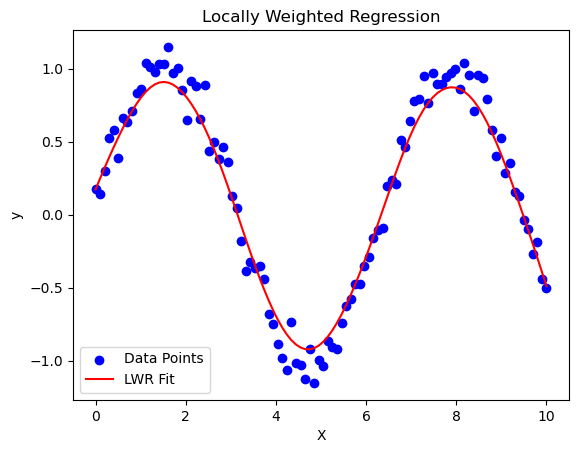

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def kernel(x, x_i, tau):
	return np.exp(-np.sum((x - x_i)**2) / (2 * tau**2))

def locally_weighted_regression(X, y, tau):
	m = X.shape[0]
	y_pred = np.zeros(m)

	for i in range(m):
		weights = np.array([kernel(X[i], X[j], tau) for j in range(m)])
		W = np.diag(weights)
		XTX = X.T @ W @ X
		XTX_inv = np.linalg.pinv(XTX)
		theta = XTX_inv @ X.T @ W @ y
		y_pred[i] = X[i] @ theta
	return y_pred


np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)


X_bias = np.c_[np.ones(X.shape[0]), X]


tau = 0.5 # Bandwidth parameter
y_pred = locally_weighted_regression(X_bias, y, tau)


plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='LWR Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()